<a href="https://colab.research.google.com/github/SAIKUMAR500/scdatabase/blob/main/Mid_Term_Project_SD_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Miditerm Project - Analyzing New York City Data with SQL, Python, and Version Control**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dailycount_cases_hospitalization_deaths.csv to dailycount_cases_hospitalization_deaths.csv
Saving NYC_residents_tested_positive.csv to NYC_residents_tested_positive.csv
Saving NYC_people_admitted_to_hospital.csv to NYC_people_admitted_to_hospital.csv


# **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sqlalchemy import create_engine
import sqlite3
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset1 = pd.read_csv('NYC_residents_tested_positive.csv')
dataset2 = pd.read_csv('NYC_people_admitted_to_hospital.csv')
dataset3 = pd.read_csv('dailycount_cases_hospitalization_deaths.csv')

We chose to work with multiple datasets covering various aspects of COVID-19 to gain a holistic understanding of the pandemic’s impact. Each dataset focuses on a different topic—tests, hospital admissions, and case data—which allows us to explore the pandemic from multiple dimensions:
1. Percent of NYC residents tested who tested positive(Dataset 1):


*   This dataset includes columns like total_test, positive_test, percent_positive, percent_positive_7days_agg, and UptDate. It provides information on the number of tests conducted, the positivity rate, and aggregated weekly positivity percentages. This data helps us analyze testing coverage, trends in positive cases, and how testing rates fluctuated over time.


2. Number of people admitted to NYC hospital for covid-19(Dataset 2):


*   Key columns are ili_pne_admit (admissions for influenza-like and pneumonia conditions), baseline, percent_change, status, and ETLdate. This dataset tracks hospital admissions related to respiratory illnesses, which often coincide with COVID-19 outbreaks. The data provides context on healthcare system strain during the pandemic and how admissions varied in response to virus surges.



3. Daily counts of Cases, Hospitalization and Deaths(Dataset 3):


*  This dataset includes CASE_COUNT, PROBABLE_CASE_COUNT, HOSPITALIZED_COUNT, DEATH_COUNT, and 7-day averages (CASE_COUNT_7DAY_AVG, ALL_CASE_COUNT_7DAY_AVG, HOSP_COUNT_7DAY_AVG, DEATH_COUNT_7DAY_AVG). It covers confirmed and probable cases, hospitalizations, and deaths due to COVID-19, along with rolling averages. This data helps assess the severity of the pandemic, tracking confirmed infections, and monitoring trends in hospitalization and mortality rates over time.



These datasets provide a comprehensive view of the pandemic, capturing essential aspects from testing to healthcare impact and outcomes. Analyzing them together allows us to understand how testing influenced case detection, how case surges impacted hospital systems, and the overall severity and trends of COVID-19. This multi-dimensional approach enriches our analysis, giving us a more complete picture of the pandemic’s dynamics.








# **Data Cleaning**

**Cleaning dataset individually**

Check for missing values

In [ ]:
dataset1.isnull().sum()

,0
date,0
total_test,0
positive_test,0
percent_positive,0
percent_positive_7days_agg,154
UptDate,0


In [ ]:
dataset1 = dataset1.drop(columns=['percent_positive_7days_agg'])

# Verify the column has been dropped by displaying the updated DataFrame's columns
print("Updated Columns in dataset1:")
print(dataset1.columns)

Updated Columns in dataset1:
Index(['date', 'total_test', 'positive_test', 'percent_positive', 'UptDate'], dtype='object')


We chose to drop the column percent_positive_7days_agg from Dataset 1 because it was deemed unnecessary for our analysis. This decision helps streamline the dataset, focusing only on the most relevant information and reducing noise, which enhances the accuracy and efficiency of our analysis.

In [ ]:
dataset2.isnull().sum()

,0
date,0
ili_pne_admit,0
baseline,0
percent_change,0
status,0
ETLdate,0


In [ ]:
dataset3.isnull().sum()

,0
date_of_interest,0
CASE_COUNT,0
PROBABLE_CASE_COUNT,0
HOSPITALIZED_COUNT,0
DEATH_COUNT,0
CASE_COUNT_7DAY_AVG,0
ALL_CASE_COUNT_7DAY_AVG,0
HOSP_COUNT_7DAY_AVG,0
DEATH_COUNT_7DAY_AVG,0
BX_CASE_COUNT,0


In [ ]:
columns_to_drop = [
    'BX_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT', 'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT',
    'BX_CASE_COUNT_7DAY_AVG', 'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG',
    'BX_HOSPITALIZED_COUNT_7DAY_AVG', 'BX_DEATH_COUNT_7DAY_AVG',
    'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT', 'BK_DEATH_COUNT',
    'BK_CASE_COUNT_7DAY_AVG', 'BK_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG',
    'BK_HOSPITALIZED_COUNT_7DAY_AVG', 'BK_DEATH_COUNT_7DAY_AVG',
    'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT', 'MN_DEATH_COUNT',
    'MN_CASE_COUNT_7DAY_AVG', 'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_ALL_CASE_COUNT_7DAY_AVG',
    'MN_HOSPITALIZED_COUNT_7DAY_AVG', 'MN_DEATH_COUNT_7DAY_AVG',
    'QN_CASE_COUNT', 'QN_PROBABLE_CASE_COUNT', 'QN_HOSPITALIZED_COUNT', 'QN_DEATH_COUNT',
    'QN_CASE_COUNT_7DAY_AVG', 'QN_PROBABLE_CASE_COUNT_7DAY_AVG', 'QN_ALL_CASE_COUNT_7DAY_AVG',
    'QN_HOSPITALIZED_COUNT_7DAY_AVG', 'QN_DEATH_COUNT_7DAY_AVG',
    'SI_CASE_COUNT', 'SI_PROBABLE_CASE_COUNT', 'SI_HOSPITALIZED_COUNT', 'SI_DEATH_COUNT',
    'SI_PROBABLE_CASE_COUNT_7DAY_AVG', 'SI_CASE_COUNT_7DAY_AVG', 'SI_ALL_CASE_COUNT_7DAY_AVG',
    'SI_HOSPITALIZED_COUNT_7DAY_AVG', 'SI_DEATH_COUNT_7DAY_AVG',
    'INCOMPLETE'
]

# Drop unnecessary columns
dataset3 = dataset3.drop(columns=columns_to_drop)


**Columns in Dataset**

In [ ]:
print("Columns in dataset1:", dataset1.columns)
print("Columns in dataset2:", dataset2.columns)
print("Columns in dataset3:", dataset3.columns)

Columns in dataset1: Index(['date', 'total_test', 'positive_test', 'percent_positive', 'UptDate'], dtype='object')
Columns in dataset2: Index(['date', 'ili_pne_admit', 'baseline', 'percent_change', 'status',
       'ETLdate'],
      dtype='object')
Columns in dataset3: Index(['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'CASE_COUNT_7DAY_AVG',
       'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG'],
      dtype='object')


In [ ]:
# Rename columns to have a consistent column name across all datasets
dataset1.rename(columns={'date': 'DATE'}, inplace=True)
dataset2.rename(columns={'date': 'DATE'}, inplace=True)
dataset3.rename(columns={'date_of_interest': 'DATE'}, inplace=True)

In [ ]:
# Strip any leading or trailing whitespace from column names
dataset1.columns = dataset1.columns.str.strip()
dataset2.columns = dataset2.columns.str.strip()
dataset3.columns = dataset3.columns.str.strip()

**Convert the 'DATE' column to datetime format in each dataset**

In [ ]:
# Convert the 'DATE' column to datetime format in each dataset
dataset1['DATE'] = pd.to_datetime(dataset1['DATE'])
dataset2['DATE'] = pd.to_datetime(dataset2['DATE'])
dataset3['DATE'] = pd.to_datetime(dataset3['DATE'])

In [ ]:
# Convert DATE columns to a common format (e.g., datetime) in each dataset
dataset1['DATE'] = pd.to_datetime(dataset1['DATE'], errors='coerce')
dataset2['DATE'] = pd.to_datetime(dataset2['DATE'], errors='coerce')
dataset3['DATE'] = pd.to_datetime(dataset3['DATE'], errors='coerce')

# Ensure all datasets have consistent date format
dataset1['DATE'] = dataset1['DATE'].dt.date
dataset2['DATE'] = dataset2['DATE'].dt.date
dataset3['DATE'] = dataset3['DATE'].dt.date

**Connect sql database in memory**

In [ ]:
# Create a connection to a temporary SQLite database in memory
conn = sqlite3.connect(':memory:')
engine = create_engine('sqlite://', creator=lambda: conn)

# Load data into SQL tables
dataset1.to_sql('dataset1', conn, index=False, if_exists='replace')
dataset2.to_sql('dataset2', conn, index=False, if_exists='replace')
dataset3.to_sql('dataset3', conn, index=False, if_exists='replace')

1711

**Join the Dataset**

In [ ]:
# Query to simulate FULL OUTER JOIN using UNION ALL and LEFT JOINs
query = '''
    SELECT a.DATE AS DATE,
           a.total_test, a.positive_test, a.percent_positive, a.UptDate,
           b.ili_pne_admit, b.baseline, b.percent_change, b.status, b.ETLdate,
           c.CASE_COUNT, c.PROBABLE_CASE_COUNT, c.HOSPITALIZED_COUNT, c.DEATH_COUNT, c.CASE_COUNT_7DAY_AVG, c.ALL_CASE_COUNT_7DAY_AVG, c.HOSP_COUNT_7DAY_AVG, c.DEATH_COUNT_7DAY_AVG
    FROM dataset1 a
    LEFT JOIN dataset2 b ON a.DATE = b.DATE
    LEFT JOIN dataset3 c ON a.DATE = c.DATE

    UNION ALL

    SELECT b.DATE AS DATE,
           a.total_test, a.positive_test, a.percent_positive, a.UptDate,
           b.ili_pne_admit, b.baseline, b.percent_change, b.status, b.ETLdate,
           c.CASE_COUNT, c.PROBABLE_CASE_COUNT, c.HOSPITALIZED_COUNT, c.DEATH_COUNT, c.CASE_COUNT_7DAY_AVG, c.ALL_CASE_COUNT_7DAY_AVG, c.HOSP_COUNT_7DAY_AVG, c.DEATH_COUNT_7DAY_AVG
    FROM dataset2 b
    LEFT JOIN dataset1 a ON b.DATE = a.DATE
    LEFT JOIN dataset3 c ON b.DATE = c.DATE
    WHERE a.DATE IS NULL

    UNION ALL

    SELECT c.DATE AS DATE,
           a.total_test, a.positive_test, a.percent_positive, a.UptDate,
           b.ili_pne_admit, b.baseline, b.percent_change, b.status, b.ETLdate,
           c.CASE_COUNT, c.PROBABLE_CASE_COUNT, c.HOSPITALIZED_COUNT, c.DEATH_COUNT, c.CASE_COUNT_7DAY_AVG, c.ALL_CASE_COUNT_7DAY_AVG, c.HOSP_COUNT_7DAY_AVG, c.DEATH_COUNT_7DAY_AVG
    FROM dataset3 c
    LEFT JOIN dataset1 a ON c.DATE = a.DATE
    LEFT JOIN dataset2 b ON c.DATE = b.DATE
    WHERE a.DATE IS NULL AND b.DATE IS NULL

    ORDER BY DATE
'''

# Execute the query and load the result into a DataFrame
merged_data = pd.read_sql(query, conn)

# Display the merged dataset
print(merged_data.head())

         DATE  total_test  positive_test  percent_positive  \
0  2020-02-29         NaN            NaN               NaN   
1  2020-03-01         2.0            0.0            0.0000   
2  2020-03-02         5.0            0.0            0.0000   
3  2020-03-03        14.0            1.0            0.0714   
4  2020-03-04        33.0            5.0            0.1515   

                  UptDate  ili_pne_admit    baseline  percent_change  status  \
0                    None            NaN         NaN             NaN    None   
1  03/17/2021 02:14:56 PM          133.0  135.952381            -2.2  Insert   
2  03/17/2021 02:14:54 PM          188.0  134.000000            40.3  Insert   
3  03/17/2021 02:15:03 PM          174.0  133.809524            30.0  Insert   
4  03/17/2021 02:15:03 PM          153.0  135.714286            12.7  Insert   

                        ETLdate  CASE_COUNT  PROBABLE_CASE_COUNT  \
0                          None           1                    0   
1  03/29/2

**Save dataset in CSV file**

In [ ]:
merged_data.to_csv('merged_dataset.csv', index=False)

# **Understanding the Dataset**

In [ ]:
merged_data.dtypes

,0
DATE,object
total_test,float64
positive_test,float64
percent_positive,float64
UptDate,object
ili_pne_admit,float64
baseline,float64
percent_change,float64
status,object
ETLdate,object


In [ ]:
merged_data.shape

(1711, 18)

In [ ]:
merged_data.size

30798

In [ ]:
merged_data.isnull().sum()

,0
DATE,0
total_test,1241
positive_test,1241
percent_positive,1241
UptDate,1241
ili_pne_admit,1241
baseline,1241
percent_change,1241
status,1241
ETLdate,1241


In [ ]:
merged_data.describe()

,total_test,positive_test,percent_positive,ili_pne_admit,baseline,percent_change,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG
count,470.000000,470.00000,470.000000,470.000000,470.000000,470.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,40401.553191,2194.53617,0.089579,180.929787,141.787234,30.822766,1740.170660,396.604909,128.551724,27.285798,1740.032145,2136.578609,128.530684,27.282291
std,26494.606421,2053.69898,0.141577,195.203730,67.453139,146.185247,4130.105087,528.535242,208.120027,81.732273,3811.924207,4269.384410,204.694929,80.772848
min,2.000000,0.00000,0.000000,37.000000,83.952381,-64.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16117.000000,465.00000,0.016225,70.250000,104.547619,-34.450000,316.000000,94.000000,35.000000,3.000000,328.500000,446.000000,35.000000,3.000000
50%,34496.000000,1314.00000,0.042700,111.000000,122.071429,-18.150000,759.000000,273.000000,66.000000,7.000000,784.000000,1068.000000,66.000000,8.000000
75%,65277.000000,3786.00000,0.083050,216.000000,152.607143,33.475000,1927.500000,520.500000,132.000000,17.000000,1986.500000,2497.500000,131.500000,16.000000
max,98353.000000,8388.00000,0.712500,1233.000000,448.523810,869.400000,55057.000000,5881.000000,1858.000000,831.000000,39531.000000,43988.000000,1687.000000,775.000000


In [ ]:
merged_data.nunique()

,0
DATE,1711
total_test,468
positive_test,436
percent_positive,374
UptDate,120
ili_pne_admit,228
baseline,431
percent_change,389
status,1
ETLdate,80


**Histograms for numerical columns**

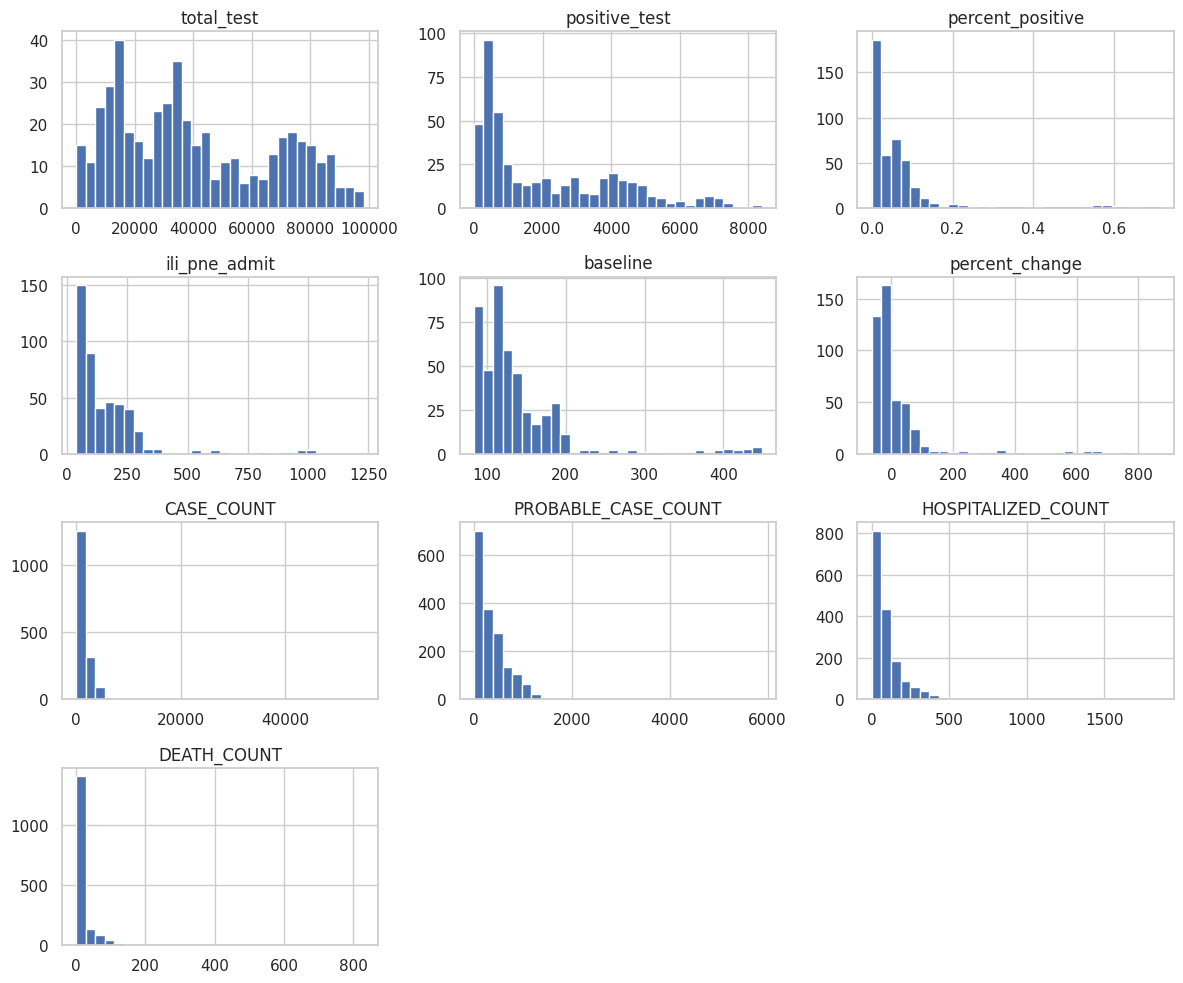

In [ ]:
sns.set(style="whitegrid")

# Plot histograms for numerical columns
numerical_cols = ['total_test', 'positive_test', 'percent_positive', 'ili_pne_admit', 'baseline', 'percent_change', 'CASE_COUNT', 'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']

merged_data[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# **Data Exploration**

In [ ]:
# Convert 'DATE' to datetime type
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'], errors='coerce')
merged_data.dtypes

,0
DATE,datetime64[ns]
total_test,float64
positive_test,float64
percent_positive,float64
UptDate,object
ili_pne_admit,float64
baseline,float64
percent_change,float64
status,object
ETLdate,object


In [ ]:
numerical_cols = ['total_test', 'positive_test', 'percent_positive', 'ili_pne_admit', 'baseline',
                  'percent_change', 'CASE_COUNT', 'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT','DEATH_COUNT', 'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG',
       'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG']
# Detect and handle outliers for numerical columns using IQR
Q1 = merged_data[numerical_cols].quantile(0.25)
Q3 = merged_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Filter out outliers (values outside the IQR range)
merged_data = merged_data[~((merged_data[numerical_cols] < lower_bound) | (merged_data[numerical_cols] > upper_bound)).any(axis=1)]

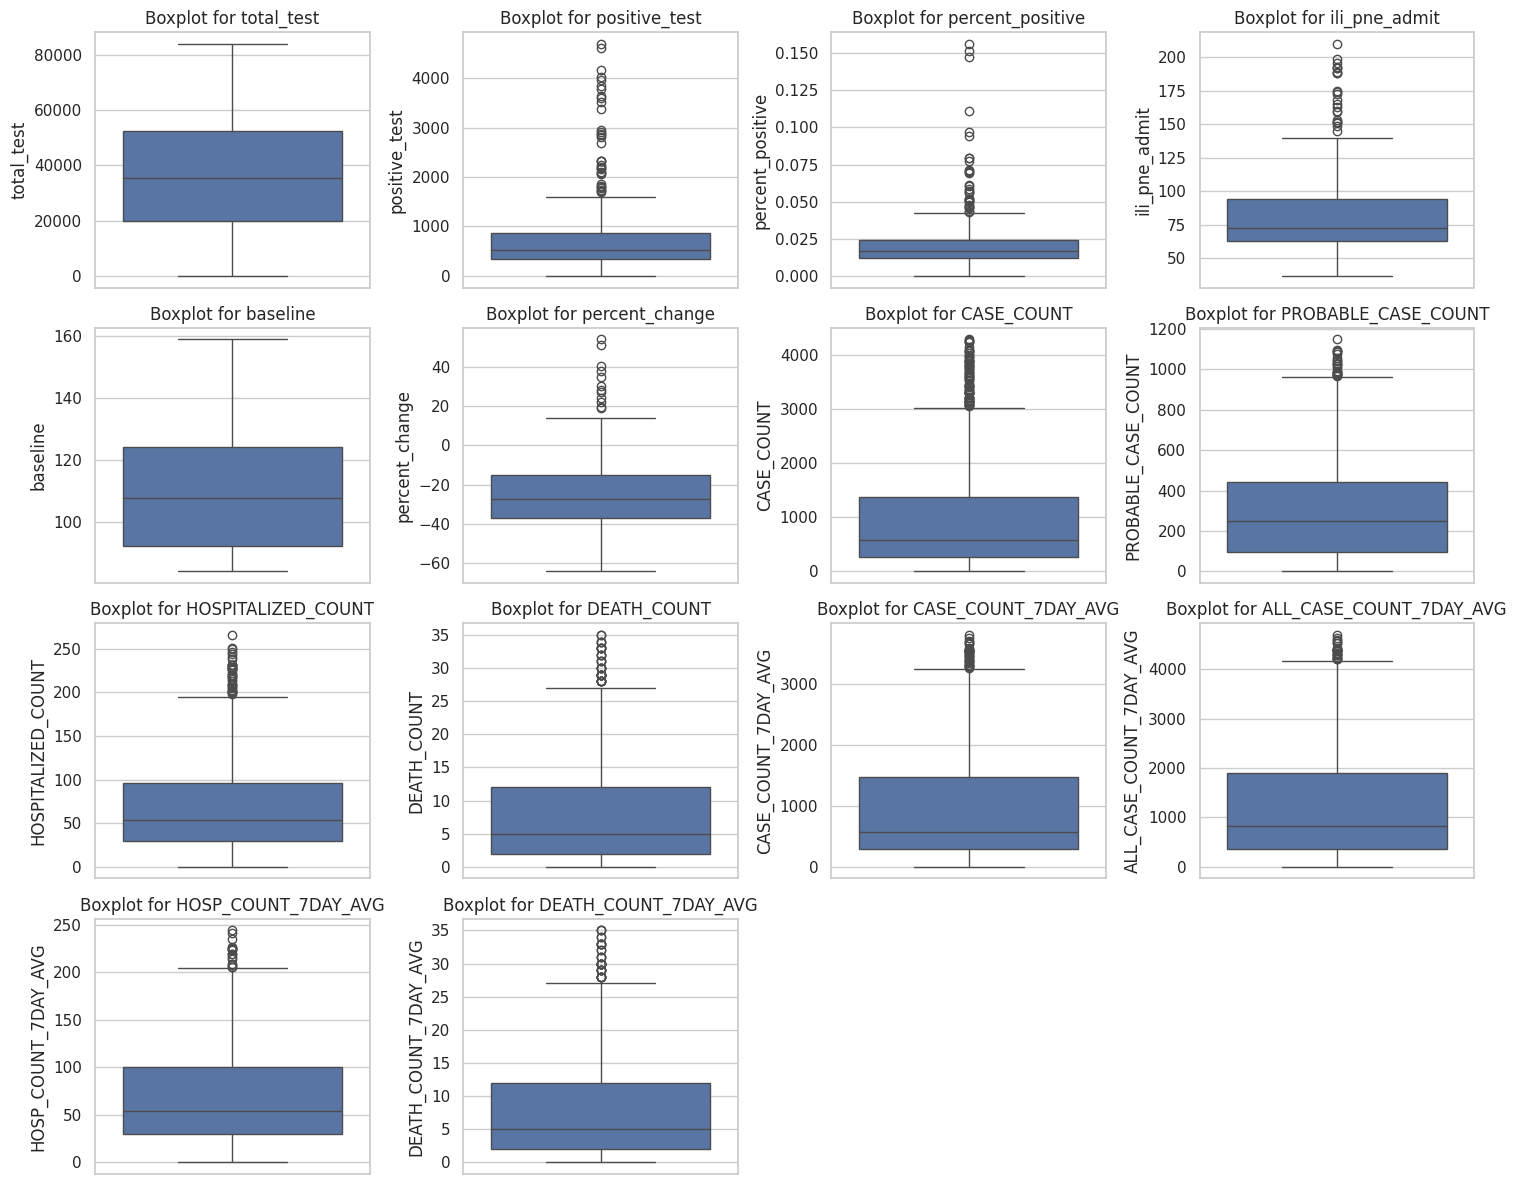

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot submodule as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(15, 12))

# Loop through each numerical column to create individual boxplots
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Create a grid of 4x4 subplots
    sns.boxplot(data=merged_data[col])
    plt.title(f"Boxplot for {col}")
    plt.xticks(rotation=45)

# Adjust the layout to make it more readable
plt.tight_layout()
plt.show()

In this analysis, we decided not to remove any outliers from the dataset. Each data point represents critical patient information, and altering or excluding these values could compromise the integrity and authenticity of our findings. Patient data, even if it appears as an outlier, holds essential meaning and contributes to a comprehensive understanding of health trends.

In [ ]:
# Check for duplicates and remove them
merged_data = merged_data.drop_duplicates()

# Inspect the cleaned dataset
print("Cleaned Data:")
print(merged_data.head())

Cleaned Data:
        DATE  total_test  positive_test  percent_positive  \
0 2020-02-29         NaN            NaN               NaN   
1 2020-03-01         2.0            0.0            0.0000   
2 2020-03-02         5.0            0.0            0.0000   
3 2020-03-03        14.0            1.0            0.0714   
4 2020-03-04        33.0            5.0            0.1515   

                  UptDate  ili_pne_admit    baseline  percent_change  status  \
0                    None            NaN         NaN             NaN    None   
1  03/17/2021 02:14:56 PM          133.0  135.952381            -2.2  Insert   
2  03/17/2021 02:14:54 PM          188.0  134.000000            40.3  Insert   
3  03/17/2021 02:15:03 PM          174.0  133.809524            30.0  Insert   
4  03/17/2021 02:15:03 PM          153.0  135.714286            12.7  Insert   

                        ETLdate  CASE_COUNT  PROBABLE_CASE_COUNT  \
0                          None           1                    0   
1 

In [ ]:
# Display the summary of cleaned data
print("Missing Values After Cleaning:")
print(merged_data.isnull().sum())

Missing Values After Cleaning:
DATE                          0
total_test                 1165
positive_test              1165
percent_positive           1165
UptDate                    1165
ili_pne_admit              1165
baseline                   1165
percent_change             1165
status                     1165
ETLdate                    1165
CASE_COUNT                    0
PROBABLE_CASE_COUNT           0
HOSPITALIZED_COUNT            0
DEATH_COUNT                   0
CASE_COUNT_7DAY_AVG           0
ALL_CASE_COUNT_7DAY_AVG       0
HOSP_COUNT_7DAY_AVG           0
DEATH_COUNT_7DAY_AVG          0
dtype: int64


# **SQL Queries**

In [ ]:
 # Checking if the tables were created in the SQLite database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:", tables)

Tables in the database:        name
0  dataset1
1  dataset2
2  dataset3


In [ ]:
import sqlite3
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/merged_dataset.csv')

# Connect to an SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('covid_data.db')

# Write the DataFrame to a table named 'merged_data' in SQLite
df.to_sql('merged_data', conn, if_exists='replace', index=False)


1711

In [ ]:
# Check columns in dataset1 table
print("Columns in dataset1 table:")
print(pd.read_sql_query("PRAGMA table_info(dataset1);", conn))

# Check columns in dataset2 table
print("Columns in dataset2 table:")
print(pd.read_sql_query("PRAGMA table_info(dataset2);", conn))

# Check columns in dataset3 table
print("Columns in dataset3 table:")
print(pd.read_sql_query("PRAGMA table_info(dataset3);", conn))

Columns in dataset1 table:
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []
Columns in dataset2 table:
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []
Columns in dataset3 table:
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []


**SQL Query 1: Aggregate monthly data for cases, hospitalizations, and deaths**

In [ ]:
query1 = """
SELECT
    strftime('%Y-%m', DATE) AS month,
    SUM(CASE_COUNT) AS total_cases,
    SUM(HOSPITALIZED_COUNT) AS total_hospitalizations,
    SUM(DEATH_COUNT) AS total_deaths
FROM merged_data
GROUP BY month
ORDER BY month;
"""

# Display the result
monthly_data = pd.read_sql_query(query1, conn)
print("Monthly Aggregated Data:")
print(monthly_data)

Monthly Aggregated Data:
      month  total_cases  total_hospitalizations  total_deaths
0   2020-02            1                       1             0
1   2020-03        65179                   18536          2638
2   2020-04       109293                   27867         16685
3   2020-05        28412                    3944          3266
4   2020-06        10845                    1534           749
5   2020-07         9793                    1155           277
6   2020-08         7446                     958           134
7   2020-09        11096                     927           127
8   2020-10        16924                    1567           173
9   2020-11        44765                    3235           349
10  2020-12        97788                    7733          1095
11  2021-01       138585                   11464          2233
12  2021-02        86445                    9222          2201
13  2021-03        92012                    8646          1817
14  2021-04        54301      

This code aggregates the data by month to observe overall trends in cases, hospitalizations, and deaths. By summarizing these values monthly, we gain a clearer view of patterns and shifts over time, which helps in identifying key trends in the dataset.

**SQL Query 2: Average Hospitalization by Month**

In [ ]:
query2 = """
SELECT
    strftime('%Y-%m', DATE) AS month,
    AVG(HOSPITALIZED_COUNT) AS avg_hospitalizations
FROM merged_data
GROUP BY month;
"""
avg_hospitalizations = pd.read_sql_query(query2, conn)
print("\nAverage Hospitalizations by Month:")
print(avg_hospitalizations)


Average Hospitalizations by Month:
      month  avg_hospitalizations
0   2020-02              1.000000
1   2020-03            597.935484
2   2020-04            928.900000
3   2020-05            127.225806
4   2020-06             51.133333
5   2020-07             37.258065
6   2020-08             30.903226
7   2020-09             30.900000
8   2020-10             50.548387
9   2020-11            107.833333
10  2020-12            249.451613
11  2021-01            369.806452
12  2021-02            329.357143
13  2021-03            278.903226
14  2021-04            179.900000
15  2021-05             56.870968
16  2021-06             25.000000
17  2021-07             42.129032
18  2021-08            108.354839
19  2021-09             87.500000
20  2021-10             53.677419
21  2021-11             52.166667
22  2021-12            396.129032
23  2022-01            596.193548
24  2022-02             81.535714
25  2022-03             29.129032
26  2022-04             53.400000
27  2022-05 

This code calculates the average number of hospitalizations per month, helping to identify patterns or changes in the hospitalization rate over time. By examining these averages, we can observe trends in healthcare demand and assess how hospitalization rates fluctuate across different months, offering valuable insights into seasonal or periodic changes in patient admissions.

**SQL Query 3: Total cases and tests per day**

In [ ]:
query3 = """
SELECT DATE, CASE_COUNT AS daily_cases, total_test AS daily_tests
FROM merged_data
ORDER BY DATE;
"""
daily_cases_tests = pd.read_sql_query(query3, conn)
print("\nDaily Cases and Tests Data:")
print(daily_cases_tests)


Daily Cases and Tests Data:
            DATE  daily_cases  daily_tests
0     2020-02-29            1          NaN
1     2020-03-01            0          2.0
2     2020-03-02            0          5.0
3     2020-03-03            1         14.0
4     2020-03-04            5         33.0
...          ...          ...          ...
1706  2024-10-31          120          NaN
1707  2024-11-01          106          NaN
1708  2024-11-02           62          NaN
1709  2024-11-03           63          NaN
1710  2024-11-04           59          NaN

[1711 rows x 3 columns]


This query retrieves daily case and test counts by date, helping analyze patterns between tests conducted and cases identified over time.

**SQL Query 4: Baseline Data Per Day**

In [ ]:
query4 = """
SELECT DATE, baseline
FROM merged_data
ORDER BY DATE;
"""
baseline_data = pd.read_sql_query(query4, conn)
print("\nBaseline Data Per Day:")
print(baseline_data)


Baseline Data Per Day:
            DATE    baseline
0     2020-02-29         NaN
1     2020-03-01  135.952381
2     2020-03-02  134.000000
3     2020-03-03  133.809524
4     2020-03-04  135.714286
...          ...         ...
1706  2024-10-31         NaN
1707  2024-11-01         NaN
1708  2024-11-02         NaN
1709  2024-11-03         NaN
1710  2024-11-04         NaN

[1711 rows x 2 columns]


This query extracts the baseline data for each date, allowing us to track baseline values over time to observe any fluctuations or trends.

**SQL Query 5: Percentage Change Data Per Day**

In [ ]:
query5 = """
SELECT DATE, percent_change
FROM merged_data
ORDER BY DATE;
"""
percent_change_data = pd.read_sql_query(query5, conn)
print("\nPercentage Change Data Per Day:")
print(percent_change_data)


Percentage Change Data Per Day:
            DATE  percent_change
0     2020-02-29             NaN
1     2020-03-01            -2.2
2     2020-03-02            40.3
3     2020-03-03            30.0
4     2020-03-04            12.7
...          ...             ...
1706  2024-10-31             NaN
1707  2024-11-01             NaN
1708  2024-11-02             NaN
1709  2024-11-03             NaN
1710  2024-11-04             NaN

[1711 rows x 2 columns]


This query retrieves daily percentage changes, helping us monitor day-to-day variations and identify any significant shifts over time.

**Query 6: Find the date with the highest number of deaths.**

In [ ]:
query6 = """
SELECT DATE, MAX(DEATH_COUNT) AS max_deaths
FROM merged_data
GROUP BY DATE
ORDER BY max_deaths DESC
LIMIT 1;
"""

highest_death_date = pd.read_sql_query(query6, conn)
print("\nDate with the highest number of deaths:")
print(highest_death_date)




Date with the highest number of deaths:
         DATE  max_deaths
0  2020-04-07         831


This query identifies the date with the highest reported deaths, allowing us to highlight the peak mortality day in the dataset.

**SQL Query 7: Calculate the 7-day moving average of new cases.**

In [ ]:
query7 = """
SELECT DATE,
       AVG(CASE_COUNT) OVER (ORDER BY DATE ASC ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS seven_day_avg_cases
FROM merged_data
ORDER BY DATE;
"""

seven_day_avg_cases = pd.read_sql_query(query7, conn)
print("\n7-Day Moving Average of New Cases:")
seven_day_avg_cases


7-Day Moving Average of New Cases:


,DATE,seven_day_avg_cases
0,2020-02-29,1.000000
1,2020-03-01,0.500000
2,2020-03-02,0.333333
3,2020-03-03,0.500000
4,2020-03-04,1.400000
...,...,...
1706,2024-10-31,104.000000
1707,2024-11-01,104.714286
1708,2024-11-02,104.714286
1709,2024-11-03,101.142857


This query calculates the 7-day moving average of new cases, smoothing daily case fluctuations to show trends over a week. This insight is useful for identifying patterns, such as gradual increases or decreases in cases, while minimizing the impact of daily variability.

# **Data Visualization**

**Scatter Plot: Total Tests vs Positive Tests**

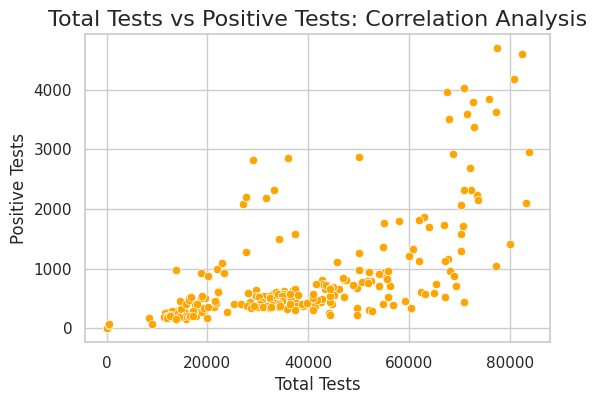

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_test', y='positive_test', data=merged_data, color='orange')
plt.title('Total Tests vs Positive Tests: Correlation Analysis', fontsize=16)
plt.xlabel('Total Tests', fontsize=12)
plt.ylabel('Positive Tests', fontsize=12)
plt.show()

**Line Plot: Hospitalized Count Over Time**

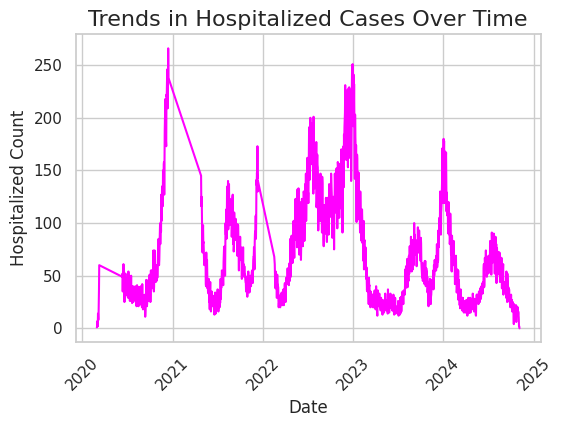

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='DATE', y='HOSPITALIZED_COUNT', data=merged_data, color='magenta')
plt.title('Trends in Hospitalized Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Hospitalized Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Box Plot: Death Count Distribution by Status**

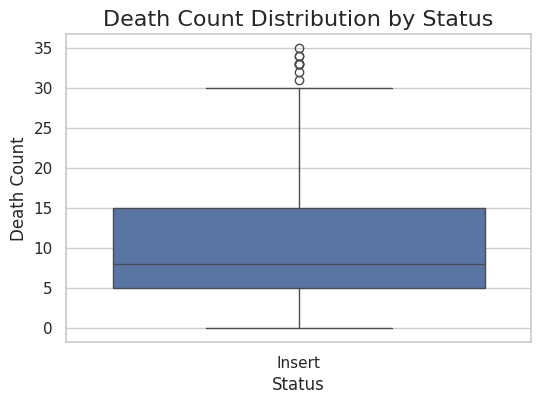

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='status', y='DEATH_COUNT', data=merged_data)
plt.title('Death Count Distribution by Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Death Count', fontsize=12)
plt.show()

**Correlation Heatmap: Total Tests, Positive Tests, Percent Positive**

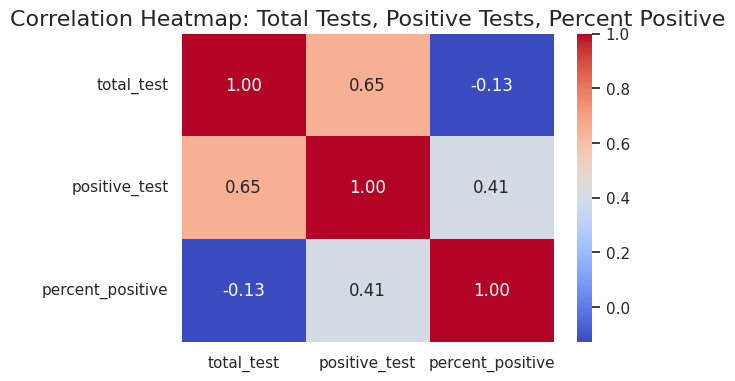

In [ ]:
correlation = merged_data[['total_test', 'positive_test', 'percent_positive']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap: Total Tests, Positive Tests, Percent Positive', fontsize=16)
plt.show()

In [ ]:
# Adjust the column names based on the actual columns in your data
fig = px.bar(monthly_data, x='month', y='total_cases', title='Monthly COVID-19 Cases')
fig.update_layout(xaxis_title='Month', yaxis_title='Total Cases')
fig.show()

**Pair Plot: Relationships Between Key Numerical Variables**

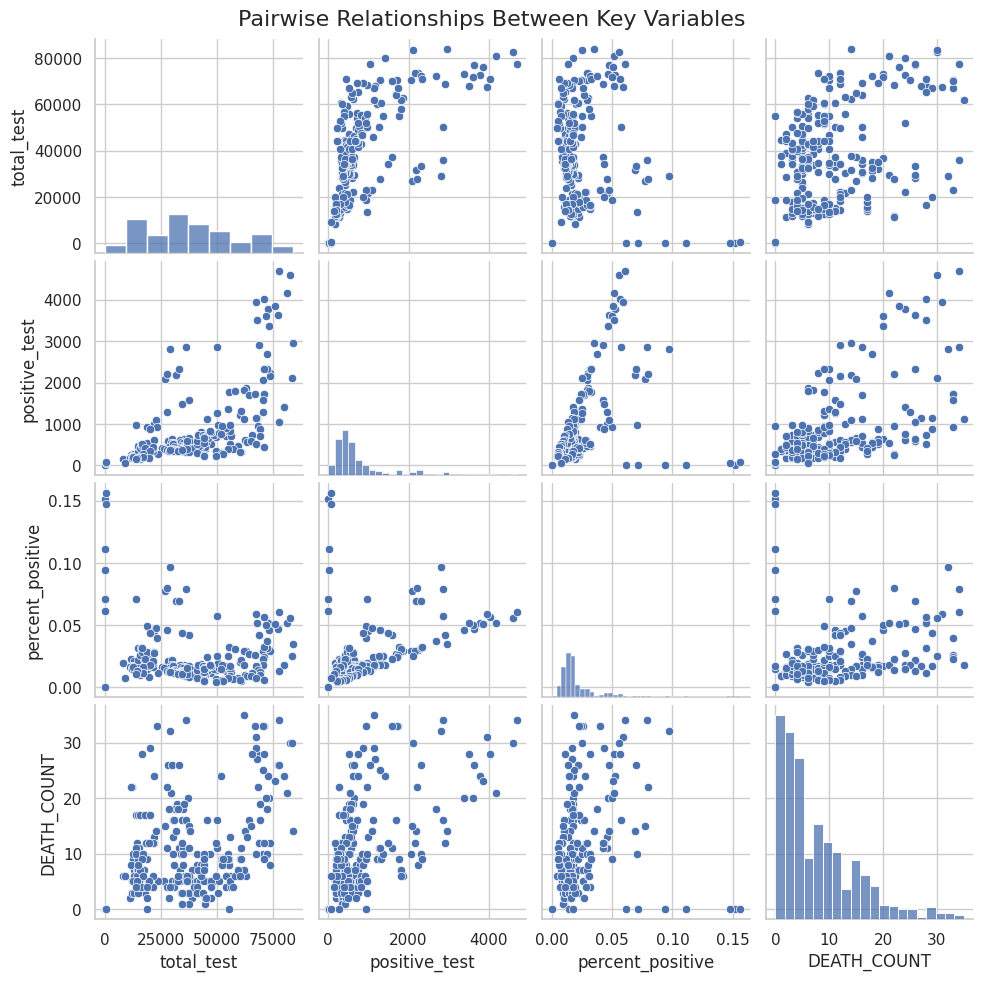

In [ ]:
sns.pairplot(merged_data[['total_test', 'positive_test', 'percent_positive', 'DEATH_COUNT']])
plt.suptitle('Pairwise Relationships Between Key Variables', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

**Facet Grid: Hospitalized vs Death Count by Status**

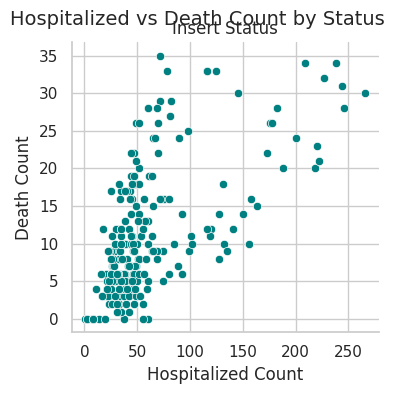

In [ ]:
g = sns.FacetGrid(merged_data, col="status", height=4, aspect=1)
g.map(sns.scatterplot, 'HOSPITALIZED_COUNT', 'DEATH_COUNT', color="teal")
g.set_axis_labels('Hospitalized Count', 'Death Count')
g.set_titles("{col_name} Status")
plt.suptitle('Hospitalized vs Death Count by Status', fontsize=14)
plt.show()

**Line Graph: Case Count Over Time**

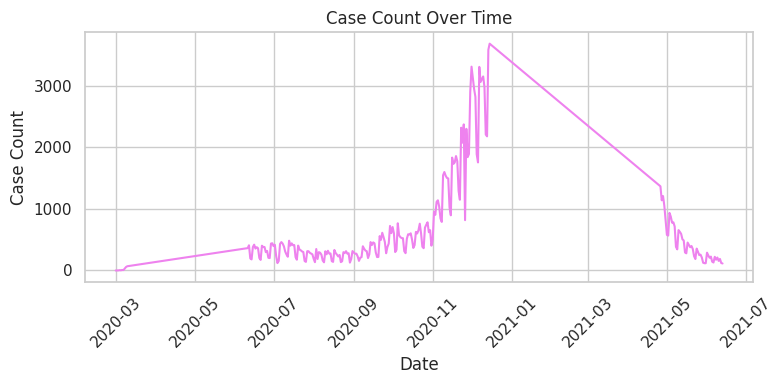

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your DataFrame and it contains 'DATE' and 'CASE_COUNT' columns
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])  # Ensure DATE is in datetime format
merged_data = merged_data.sort_values('DATE')  # Sort by date for a sequential plot

# Plotting the line graph
plt.figure(figsize=(8, 4))
plt.plot(merged_data['DATE'], merged_data['CASE_COUNT'], color='violet', linestyle='-')

# Adding titles and labels
plt.title('Case Count Over Time')
plt.xlabel('Date')
plt.ylabel('Case Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(True)
plt.tight_layout()
plt.show()

**Violin Plot: Distribution of Death Count by Hospitalized Count**

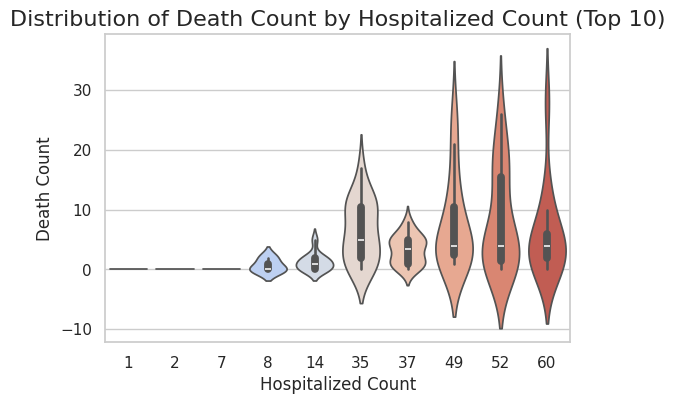

In [ ]:
# Violin plot of DEATH_COUNT distribution by HOSPITALIZED_COUNT for the first 10 unique HOSPITALIZED_COUNT values
top_10_hospitalized = merged_data['HOSPITALIZED_COUNT'].dropna().unique()[:10]
filtered_data = merged_data[merged_data['HOSPITALIZED_COUNT'].isin(top_10_hospitalized)]

# Plot
plt.figure(figsize=(6, 4))
sns.violinplot(x='HOSPITALIZED_COUNT', y='DEATH_COUNT', data=filtered_data, palette="coolwarm")
plt.title('Distribution of Death Count by Hospitalized Count (Top 10)', fontsize=16)
plt.xlabel('Hospitalized Count', fontsize=12)
plt.ylabel('Death Count', fontsize=12)
plt.show()

**Trends in Daily COVID-19 Confirmed Cases and Hospitalizations**

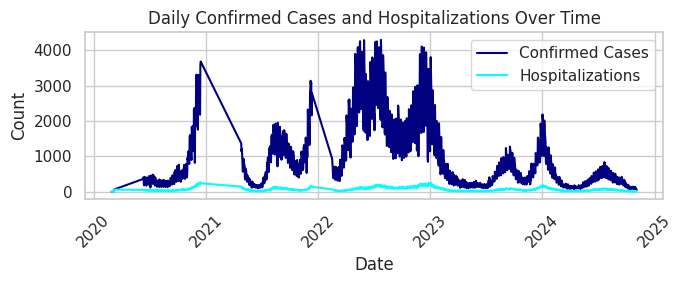

In [ ]:
# Ensure the 'DATE' column is in datetime format
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

plt.figure(figsize=(7, 3))
plt.plot(merged_data['DATE'], merged_data['CASE_COUNT'], label='Confirmed Cases', color='navy')
plt.plot(merged_data['DATE'], merged_data['HOSPITALIZED_COUNT'], label='Hospitalizations', color='cyan')
plt.title('Daily Confirmed Cases and Hospitalizations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')

# Display legend
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Monthly Trend of COVID-19 Cases, Hospitalizations, and Deaths**

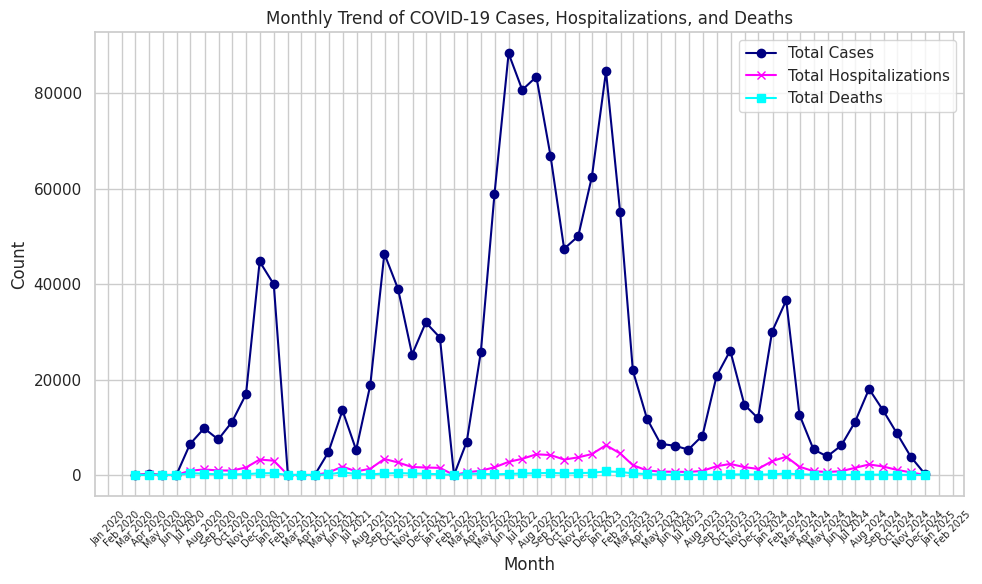

In [ ]:
# Ensure 'DATE' column is in datetime format
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

# Aggregating data by month for your dataset
monthly_data = merged_data.resample('M', on='DATE').sum()  # Sum values for each month

# Plotting monthly total cases, hospitalizations, and deaths
plt.figure(figsize=(10, 6))

# Plot total cases
plt.plot(monthly_data.index, monthly_data['CASE_COUNT'], label='Total Cases', marker='o', color='navy')

# Plot total hospitalizations
plt.plot(monthly_data.index, monthly_data['HOSPITALIZED_COUNT'], label='Total Hospitalizations', marker='x', color='magenta')

# Plot total deaths
plt.plot(monthly_data.index, monthly_data['DEATH_COUNT'], label='Total Deaths', marker='s', color='cyan')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Trend of COVID-19 Cases, Hospitalizations, and Deaths')
plt.legend()

# Formatting the x-axis for month and year
plt.xticks(rotation=45, fontsize=7)  # Reduce font size of x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Show month and year (e.g., Jan 2021)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set tick locator to monthly intervals

plt.tight_layout()
plt.show()

**Average Daily Hospitalizations Due to COVID-19**

In [ ]:
import plotly.graph_objects as go

# Create a line plot using Plotly Graph Objects
fig = go.Figure()

# Add traces for daily values
fig.add_trace(go.Scatter(x=merged_data['DATE'], y=merged_data['CASE_COUNT'],
                         mode='lines', name='Daily Cases', line=dict(color='pink')))
fig.add_trace(go.Scatter(x=merged_data['DATE'], y=merged_data['HOSPITALIZED_COUNT'],
                         mode='lines', name='Daily Hospitalizations', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=merged_data['DATE'], y=merged_data['DEATH_COUNT'],
                         mode='lines', name='Daily Deaths', line=dict(color='lime')))

# Add traces for 7-day averages
fig.add_trace(go.Scatter(x=merged_data['DATE'], y=merged_data['CASE_COUNT_7DAY_AVG'],
                         mode='lines', name='7-Day Avg Cases', line=dict(color='pink', dash='dash')))
fig.add_trace(go.Scatter(x=merged_data['DATE'], y=merged_data['HOSP_COUNT_7DAY_AVG'],
                         mode='lines', name='7-Day Avg Hospitalizations', line=dict(color='yellow', dash='dash')))
fig.add_trace(go.Scatter(x=merged_data['DATE'], y=merged_data['DEATH_COUNT_7DAY_AVG'],
                         mode='lines', name='7-Day Avg Deaths', line=dict(color='lime', dash='dash')))

# Customize the layout with Plotly for a professional look
fig.update_layout(
    title='Comparison of Daily cases and 7-Day Averages',
    xaxis_title='DATE',
    yaxis_title='Count',
    legend_title='Legend',
    template='plotly_dark',  # Optional: dark theme for better visualization
    xaxis=dict(
        tickformat='%Y-%m-%d',  # Date formatting
        rangeslider=dict(visible=True)  # Adds a range slider for interactive exploration
    )
)

# Display the plot
fig.show()


**Correlation Matrix**

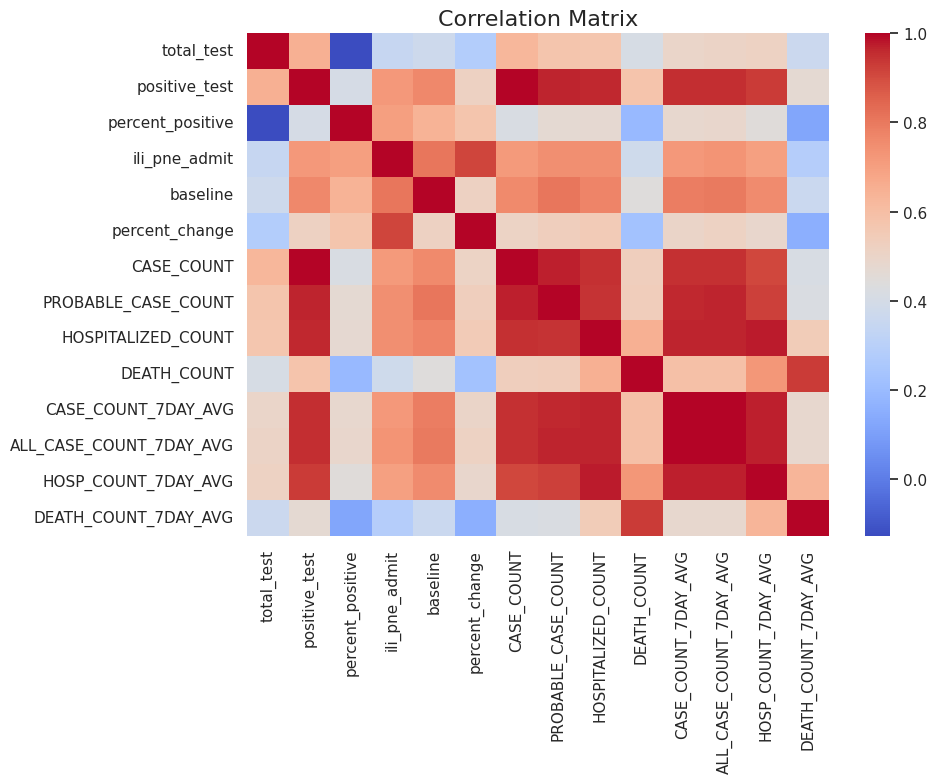

In [ ]:
# numerical columns from the dataset
numerical_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# **Challenges**

**Challenge 1: Handling Missing Values**

**Solution:** Missing values can disrupt the analysis and model training. To handle this, you can:

1. Impute values using the mean or median for numerical data.
2. Forward fill or backward fill for time-series data, filling gaps with the previous or next available data.
3. Remove rows with excessive missing values if they’re not critical.

**Challenge 2: Outliers Affecting Data Quality**

**Solution:** Outliers can distort trends and predictions. To handle outliers, you can:

1. Identify outliers using Z-scores or IQR.
2. Cap values or Winsorize extreme values to reduce their impact.
3. Log-transform data to make the distribution more normal.

**Challenge 3: Data Inconsistencies Across Time Periods**

**Solution:** When dealing with time-series data, different formats or irregular intervals can cause inconsistencies. To address this:

1. Standardize date formats and ensure consistency across the dataset.
2. Reindex the data to fill missing time periods with appropriate values, like forward filling or interpolation.
